In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 17.8 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# upload manually with button "Choose Files"
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_excel('HOMO-LUMO-energies.xlsx')
smiles_list = df["Smiles"]


Saving HOMO-LUMO-energies.xlsx to HOMO-LUMO-energies.xlsx


# Morgan

In [ ]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
from rdkit.Chem import rdFingerprintGenerator

# Create a Morgan generator (once)
fingerprints = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
len(mols)

63

In [ ]:
homo_values = df["HOMO energy (eV)"]
lumo_values = df["LUMO energy (eV)"]
dff_values = df["dFF"]

# Convert the RDKit fingerprint objects to NumPy arrays
features = np.column_stack((fingerprints, homo_values, lumo_values))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 63

In [ ]:
with open('out-SVR-Morgan-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# features = your fingerprint array
# dff_values = your target values

r2_scores = []  # store all R²

with open('out-SVR-Morgan-rbf.txt', 'w') as f:
    for i in np.arange(0,200):
        # splitting dataset into train and test data
        x_train, x_test, y_train, y_test = train_test_split(
            features, dff_values, test_size=0.20, random_state=i
        )
        regressor = SVR(kernel='rbf')
        regressor.fit(x_train, y_train)

        # Evaluate the model
        y_pred = regressor.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

        f.write(f"Seed {i}\tR2: {r2:.6f}\n")

    # After loop: compute mean and std
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    f.write("\n")
    f.write(f"Mean R2 over 200 runs: {mean_r2:.6f}\n")
    f.write(f"Std R2 over 200 runs: {std_r2:.6f}\n")

print("Mean R2:", mean_r2)
print("Std R2:", std_r2)


In [ ]:
with open('out-SVR-Morgan-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
with open('out-SVR-Morgan-sigmoid.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='sigmoid')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

# MACCS

In [ ]:
#MACCS
from rdkit.Chem import MACCSkeys

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Maccs_fingerprints = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]

In [ ]:
features = np.column_stack((Maccs_fingerprints, homo_values, lumo_values))

with open('out-SVR-rbf-MACCS.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)


In [ ]:
features = np.column_stack((Maccs_fingerprints, homo_values, lumo_values))

with open('out-SVR-sigmoid-MACCS.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='sigmoid')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((Maccs_fingerprints, homo_values, lumo_values))

with open('out-SVR-linear-MACCS.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

# Avalon

In [ ]:
pip install rdkit-pypi avalon_framework

  Preparing metadata (setup.py) ... done
  Created wheel for avalon_framework: filename=avalon_framework-1.8.2-py3-none-any.whl size=3868 sha256=9ccb0fa3318ea57b475c5bcf3f4fcc8949cdfb35c0fd3afb0afa20c0e8633b47
  Stored in directory: /root/.cache/pip/wheels/19/a3/86/e8991278ac56c74bdc9382f08c2790b5c3bbcd8ea5c08f9a90
Successfully built avalon_framework


In [ ]:
from rdkit import Chem
from rdkit.Avalon import pyAvalonTools

In [ ]:
Avalon_fingerprints = [pyAvalonTools.GetAvalonFP(mol) for mol in mols]

In [ ]:
features = np.column_stack((Avalon_fingerprints, homo_values, lumo_values))

with open('out-SVR-rbf-Avalon.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((Avalon_fingerprints, homo_values, lumo_values))

with open('out-SVR-sigmoid-Avalon.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='sigmoid')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((Avalon_fingerprints, homo_values, lumo_values))

with open('out-SVR-linear-Avalon.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    #r2_array = np.array(r2_score)
    #print(r2_array, file=f)
  #print(r2_score_value)

    print(r2_score_value, file=f)

# Daylight

In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
Daylight_fingerprints = [Chem.RDKFingerprint(mol) for mol in mols]

In [ ]:
features = np.column_stack((Daylight_fingerprints, homo_values, lumo_values))

with open('out-SVR-rbf-Daylight.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((Daylight_fingerprints, homo_values, lumo_values))

with open('out-SVR-linear-Daylight.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((Daylight_fingerprints, homo_values, lumo_values))

with open('out-SVR-sigmoid-Daylight.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='sigmoid')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

# AtomPairs

In [ ]:
from rdkit.Chem import rdMolDescriptors

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
atom_pairs_fingerprints = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol) for mol in mols]

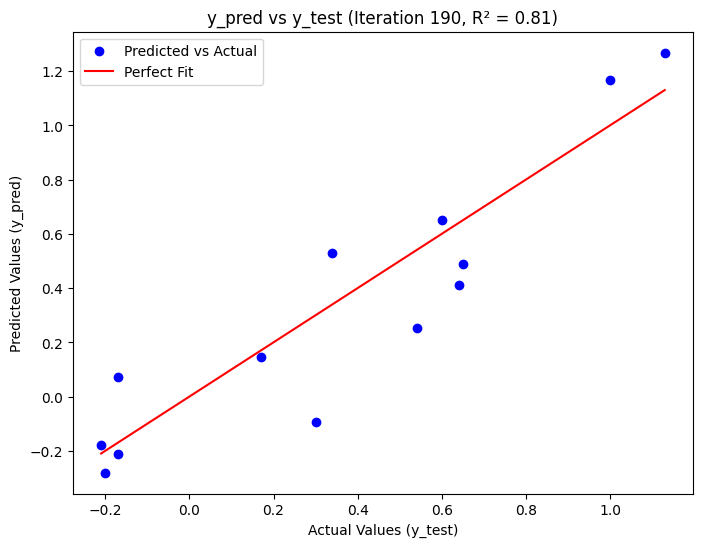

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming atom_pairs_fingerprints, homo_values, lumo_values, dff_values are defined
features = np.column_stack((atom_pairs_fingerprints, homo_values, lumo_values))

with open('out-SVR-sigmoid-atompairs.txt', 'w') as f:
    for i in np.arange(0, 200):
        # Splitting dataset into train and test data
        x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state=i)

        # Training SVR model
        regressor = SVR(kernel='sigmoid')
        regressor.fit(x_train, y_train)

        # Predicting the output
        y_pred = regressor.predict(x_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2_score_value = r2_score(y_test, y_pred)

        print(r2_score_value, file=f)

        # Only save the data and plot if r2_score_value > 0.8
        if r2_score_value > 0.8:
            # Plot y_pred vs y_test
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Perfect Fit")
            plt.xlabel("Actual Values (y_test)")
            plt.ylabel("Predicted Values (y_pred)")
            plt.title(f"y_pred vs y_test (Iteration {i}, R² = {r2_score_value:.2f})")
            plt.legend()
            plt.show()

            # Save the plot
            #plt.savefig(f'y_pred_vs_y_test_iteration_{i}_r2_{r2_score_value:.2f}.png')
            plt.close()

            # Save the R² value, y_test, and y_pred to a CSV file
            data = {
                'y_test': y_test,
                'y_pred': y_pred
            }
            df = pd.DataFrame(data)
            df['r2_score'] = r2_score_value  # Adding the r2 value to the DataFrame

            # Save the DataFrame to a CSV file
            df.to_csv(f'output-atompairs-linear_{i}_r2_{r2_score_value:.2f}.csv', index=False)






In [ ]:
features = np.column_stack((atom_pairs_fingerprints, homo_values, lumo_values))

with open('out-SVR-rbf-atompairs.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# === Load and preprocess data ===
df = pd.read_excel("HOMO-LUMO-energies.xlsx")
df.columns = ["Cmpd Lab", "Smiles", "dFF", "HOMO energy (eV)", "LUMO energy (eV)"]

# Extract relevant data
smiles_list = df["Smiles"].tolist()
homo_values = df["HOMO energy (eV)"].to_numpy().astype(float)
lumo_values = df["LUMO energy (eV)"].to_numpy().astype(float)
dff_values = df["dFF"].to_numpy().astype(float)

# === Generate AtomPairs fingerprints ===
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
atom_pairs_fps = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol) for mol in mols]
fingerprints_array = np.array([list(map(int, fp.ToBitString())) for fp in atom_pairs_fps])

# Combine fingerprints with raw HOMO/LUMO energies (not scaled)
features = np.column_stack((fingerprints_array, homo_values, lumo_values))

# === SVR modeling over 200 runs ===
best_r2 = -np.inf
best_model_index = -1

with open("out-SVR-linear-atompairs-unscaled.txt", "w") as f:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state=i)
        regressor = SVR(kernel="linear")
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        r2 = r2_score(y_test, y_pred)

        # Save all scores
        print(r2, file=f)

        # Track best R2 and model index
        if r2 > best_r2:
            best_r2 = r2
            best_model_index = i + 1  # 1-based index

# === Print the best R2 score and model number ===
print(f"Best R² score (unscaled energy): {best_r2:.4f} (Model {best_model_index})")


Best R² score (unscaled energy): 0.8085 (Model 19)


# Topological Torsion

In [ ]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
torsion_fingerprints = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol) for mol in mols]

In [ ]:
features = np.column_stack((torsion_fingerprints, homo_values, lumo_values))

with open('out-SVR-linear-torsion.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((torsion_fingerprints, homo_values, lumo_values))

with open('out-SVR-rbf-torsion.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
features = np.column_stack((torsion_fingerprints, homo_values, lumo_values))

with open('out-SVR-sigmoid-torsion.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(features, dff_values, test_size=0.20, random_state = i)
    regressor = SVR(kernel='sigmoid')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

In [ ]:
# Fingerprints + SVR: report per-run R2 and mean/std R2 for each (FP, kernel)

import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys, rdMolDescriptors
from rdkit.Avalon import pyAvalonTools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# ---------------------------
# Config
# ---------------------------
N_RUNS = 200
TEST_SIZE = 0.20
RANDOM_BASE = 0

DATA_XLSX = "HOMO-LUMO-energies.xlsx"
SMILES_COL = "Smiles"
LABEL_COL  = "Cmpd Label"
HOMO_COL   = "HOMO energy (eV)"
LUMO_COL   = "LUMO energy (eV)"
TARGET_COL = "dFF"

FP_SIZE = 2048  # for bitvect sizes where applicable

KERNELS = ["linear", "rbf", "sigmoid"]

# ---------------------------
# Helpers
# ---------------------------
def explicit_bitvects_to_numpy(bitvects):
    """Convert list of RDKit ExplicitBitVect to dense float32 numpy array."""
    arr = np.array([list(bv) for bv in bitvects], dtype=np.float32)
    return arr

def build_features_from_bitvects(bitvects, homo, lumo):
    X_bits = explicit_bitvects_to_numpy(bitvects)
    E = np.column_stack([np.asarray(homo, dtype=np.float32),
                         np.asarray(lumo, dtype=np.float32)])
    return np.hstack([X_bits, E])

def run_svr_over_splits(X, y, kernel, out_txt):
    """
    Train SVR over N_RUNS random splits; write per-run R2 to out_txt.
    Return list of R2s for aggregation.
    """
    r2s = []
    with open(out_txt, "w") as f:
        for i in range(N_RUNS):
            xtr, xte, ytr, yte = train_test_split(
                X, y, test_size=TEST_SIZE, random_state=RANDOM_BASE + i
            )
            model = SVR(kernel=kernel)
            model.fit(xtr, ytr)
            ypred = model.predict(xte)
            r2 = r2_score(yte, ypred)
            r2s.append(r2)
            f.write(f"Seed {i:03d}\tR2: {r2:.6f}\n")
        f.write("\n")
        f.write(f"Mean R2 over {N_RUNS} runs: {np.mean(r2s):.6f}\n")
        f.write(f"Std  R2 over {N_RUNS} runs: {np.std(r2s):.6f}\n")
    return r2s

def print_mean_std(model_name, r2s):
    print(f"{model_name:30s}  Mean R2 = {np.mean(r2s):.4f}   Std = {np.std(r2s):.4f}")

# ---------------------------
# Load data
# ---------------------------
df = pd.read_excel(DATA_XLSX)
smiles_list = df[SMILES_COL].astype(str).tolist()
homo_values = df[HOMO_COL].values
lumo_values = df[LUMO_COL].values
y = df[TARGET_COL].astype(float).values

mols = [Chem.MolFromSmiles(s) for s in smiles_list]
mols = [m for m in mols if m is not None]

# ---------------------------
# Prepare all fingerprints
# ---------------------------
print("Generating fingerprints...")

# Morgan (ECFP4) bits
fp_morgan = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=FP_SIZE) for m in mols]
X_morgan = build_features_from_bitvects(fp_morgan, homo_values, lumo_values)

# MACCS bits (166-bit)
fp_maccs = [MACCSkeys.GenMACCSKeys(m) for m in mols]
X_maccs = build_features_from_bitvects(fp_maccs, homo_values, lumo_values)

# Avalon bits
fp_avalon = [pyAvalonTools.GetAvalonFP(m, nBits=FP_SIZE) for m in mols]
X_avalon = build_features_from_bitvects(fp_avalon, homo_values, lumo_values)

# Daylight / RDKit topological bits
fp_daylight = [Chem.RDKFingerprint(m, fpSize=FP_SIZE) for m in mols]
X_daylight = build_features_from_bitvects(fp_daylight, homo_values, lumo_values)

# AtomPairs bits
fp_atompairs = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(m, nBits=FP_SIZE) for m in mols]
X_atompairs = build_features_from_bitvects(fp_atompairs, homo_values, lumo_values)

# Topological Torsion bits
fp_torsion = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(m, nBits=FP_SIZE) for m in mols]
X_torsion = build_features_from_bitvects(fp_torsion, homo_values, lumo_values)

# ---------------------------
# Run models & collect summaries
# ---------------------------
results = {}

def run_block(X, name_prefix):
    for k in KERNELS:
        out_name = f"out-SVR-{name_prefix}-{k}.txt"
        r2s = run_svr_over_splits(X, y, kernel=k, out_txt=out_name)
        key = f"{name_prefix}-{k}"
        results[key] = (np.mean(r2s), np.std(r2s))
        print_mean_std(key, r2s)

print("\nTraining models and computing mean/std R2 ...\n")

run_block(X_morgan,   "Morgan")
run_block(X_maccs,    "MACCS")
run_block(X_avalon,   "Avalon")
run_block(X_daylight, "Daylight")
run_block(X_atompairs,"AtomPairs")
run_block(X_torsion,  "Torsion")

# ---------------------------
# Print a compact summary table
# ---------------------------
print("\n" + "="*62)
print(f"{'Model':30s} | {'Mean R2':>8s} | {'Std R2':>8s}")
print("-"*62)
for key, (m, s) in results.items():
    print(f"{key:30s} | {m:8.4f} | {s:8.4f}")
print("="*62)


Generating fingerprints...


[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerator
[23:22:45] DEPRECATION WARNING: please use MorganGenerat


Training models and computing mean/std R2 ...

Morgan-linear                   Mean R2 = 0.1194   Std = 0.4298
Morgan-rbf                      Mean R2 = 0.1372   Std = 0.2446
Morgan-sigmoid                  Mean R2 = -0.4845   Std = 0.5743
MACCS-linear                    Mean R2 = -0.6501   Std = 1.0121
MACCS-rbf                       Mean R2 = 0.1859   Std = 0.2550
MACCS-sigmoid                   Mean R2 = -0.2336   Std = 0.4644
Avalon-linear                   Mean R2 = 0.1868   Std = 0.4305
Avalon-rbf                      Mean R2 = 0.0792   Std = 0.2454
Avalon-sigmoid                  Mean R2 = 0.1871   Std = 0.2770
Daylight-linear                 Mean R2 = 0.1968   Std = 0.4112
Daylight-rbf                    Mean R2 = 0.1019   Std = 0.2479
Daylight-sigmoid                Mean R2 = 0.1241   Std = 0.2564
AtomPairs-linear                Mean R2 = 0.2460   Std = 0.3955
AtomPairs-rbf                   Mean R2 = 0.1610   Std = 0.2312
AtomPairs-sigmoid               Mean R2 = 0.1357   St